Import neccesary packages like pandas, numpy, and matplotlib.pyplot

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Setup Complete")

Setup Complete


Since each dataset is monthly, write some code to combine all 12 data sets for 2019.

In [19]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
different_csvs = []
for month in months:
  monthly = pd.read_csv(f'https://raw.githubusercontent.com/i-am-darshil/Data-Analysis-With-Pandas/main/SalesData/Sales_{month}_2019.csv')
  different_csvs.append(monthly)

df = pd.concat(different_csvs, ignore_index=True)

Determine whether there are null values in the combined dataset.

In [20]:
nan_count = df.isna().sum(axis=0)
print(nan_count)
print(df.info())

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB
None


Clean dataset by:
1. dropping null values
2. reseting the index so there are no missing numbers

In [21]:
df_clean = df.dropna()
df_reset = df_clean.reset_index(drop=True)
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


Remove the values that aren't null but aren't inputed as an actual value.

In [22]:
df_reset.drop(df_reset[df_reset['Quantity Ordered'] == "Quantity Ordered"].index, inplace=True)

Change the column types to more appropriate types. So for example if the column holds numeric values, make sure the type is a float/integer instead of a string/object.

In [23]:
df_reset['Quantity Ordered'] = df_reset['Quantity Ordered'].astype(int)
df_reset['Price Each'] = df_reset['Price Each'].astype(float)
df_reset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [24]:
print(df_reset)

       Order ID                     Product  Quantity Ordered  Price Each  \
0        141234                      iPhone                 1      700.00   
1        141235    Lightning Charging Cable                 1       14.95   
2        141236            Wired Headphones                 2       11.99   
3        141237            27in FHD Monitor                 1      149.99   
4        141238            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186300   319666    Lightning Charging Cable                 1       14.95   
186301   319667       AA Batteries (4-pack)                 2        3.84   
186302   319668             Vareebadd Phone                 1      400.00   
186303   319669            Wired Headphones                 1       11.99   
186304   319670  Bose SoundSport Headphones                 1       99.99   

            Order Date                        Purchase Address  
0       01

Create a column for the total transaction amount per order. Get this by identifying the price of each product and multiplying it by the quantity ordered.

In [25]:
df_reset["Total Price"] = df_reset["Quantity Ordered"] * df_reset["Price Each"]
df_reset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99
...,...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",14.95
186301,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",7.68
186302,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",400.00
186303,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",11.99


Create a column for the state the order was placed in so you can do state-wide analysis.

In [26]:
df_reset["State"] = df_reset['Purchase Address'].str[-8:-6]
df_reset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,State
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00,MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95,OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98,CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99,CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99,TX
...,...,...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",14.95,CA
186301,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",7.68,CA
186302,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",400.00,WA
186303,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",11.99,TX


Use Matplotlib.pyplot to create a graph that identifies which state generates the most revenue.

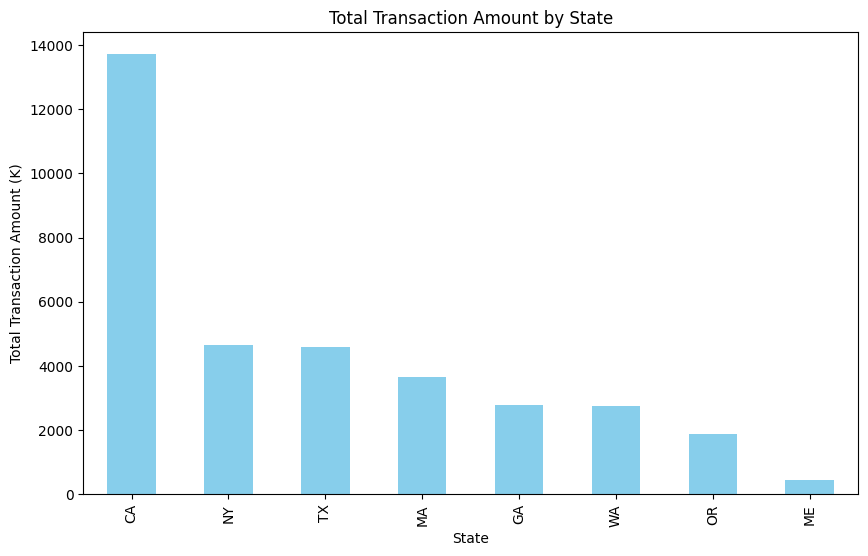

In [27]:
state_totals = df_reset.groupby('State')['Total Price'].sum() / 1000
state_totals = state_totals.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
graph = state_totals.plot(kind='bar', color='skyblue')

plt.title('Total Transaction Amount by State')
plt.xlabel('State')
plt.ylabel('Total Transaction Amount (K)')

graph.ticklabel_format(style='plain', axis='y')

plt.show()

Figure out which product generates the most revenue for ht ebusiness by creating a graph that groups the price by product and putting that on a graph. Also figure out which product is being ordered the most. (Same thing but with quantity ordered)

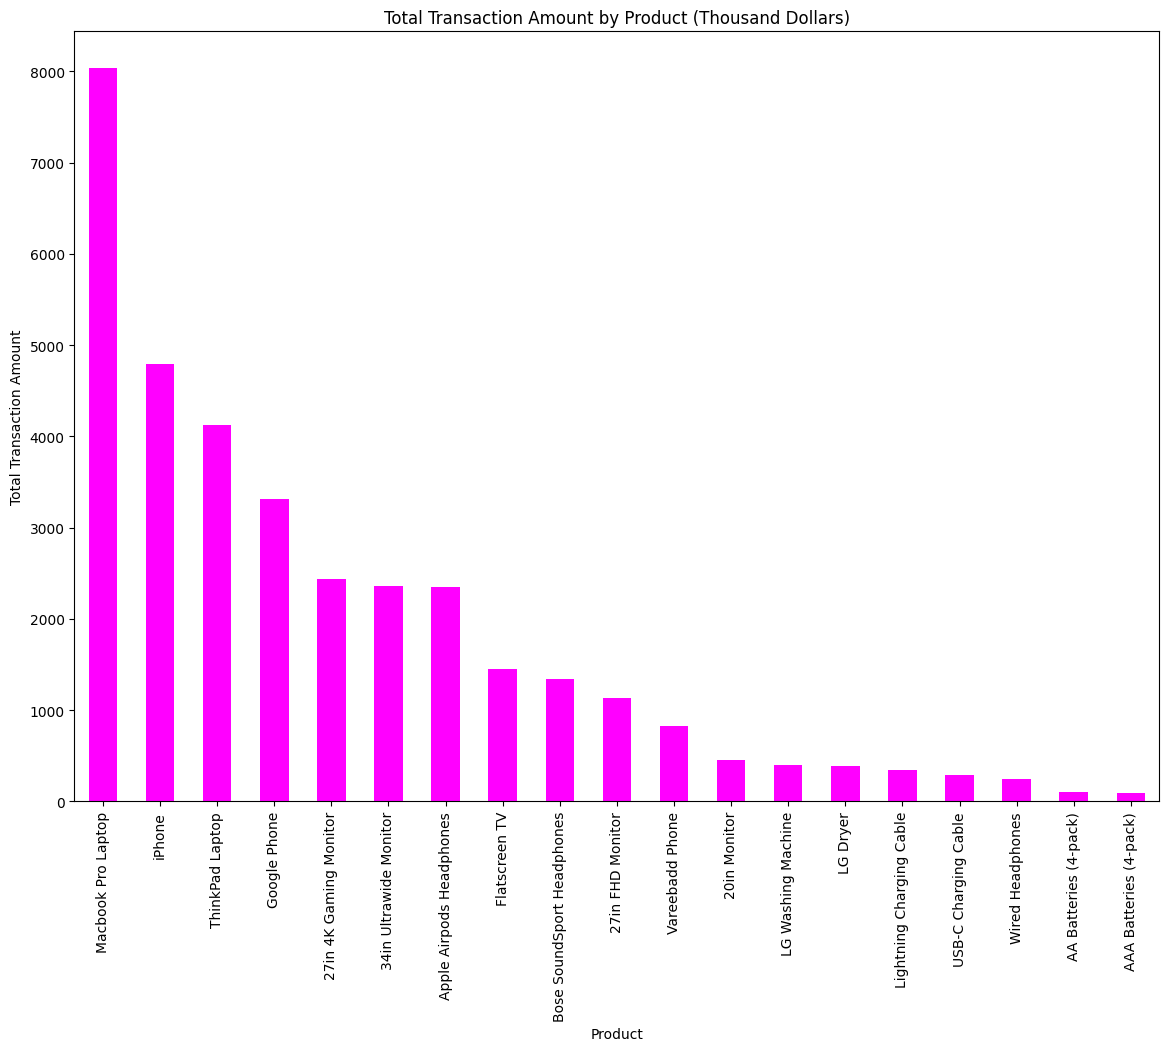

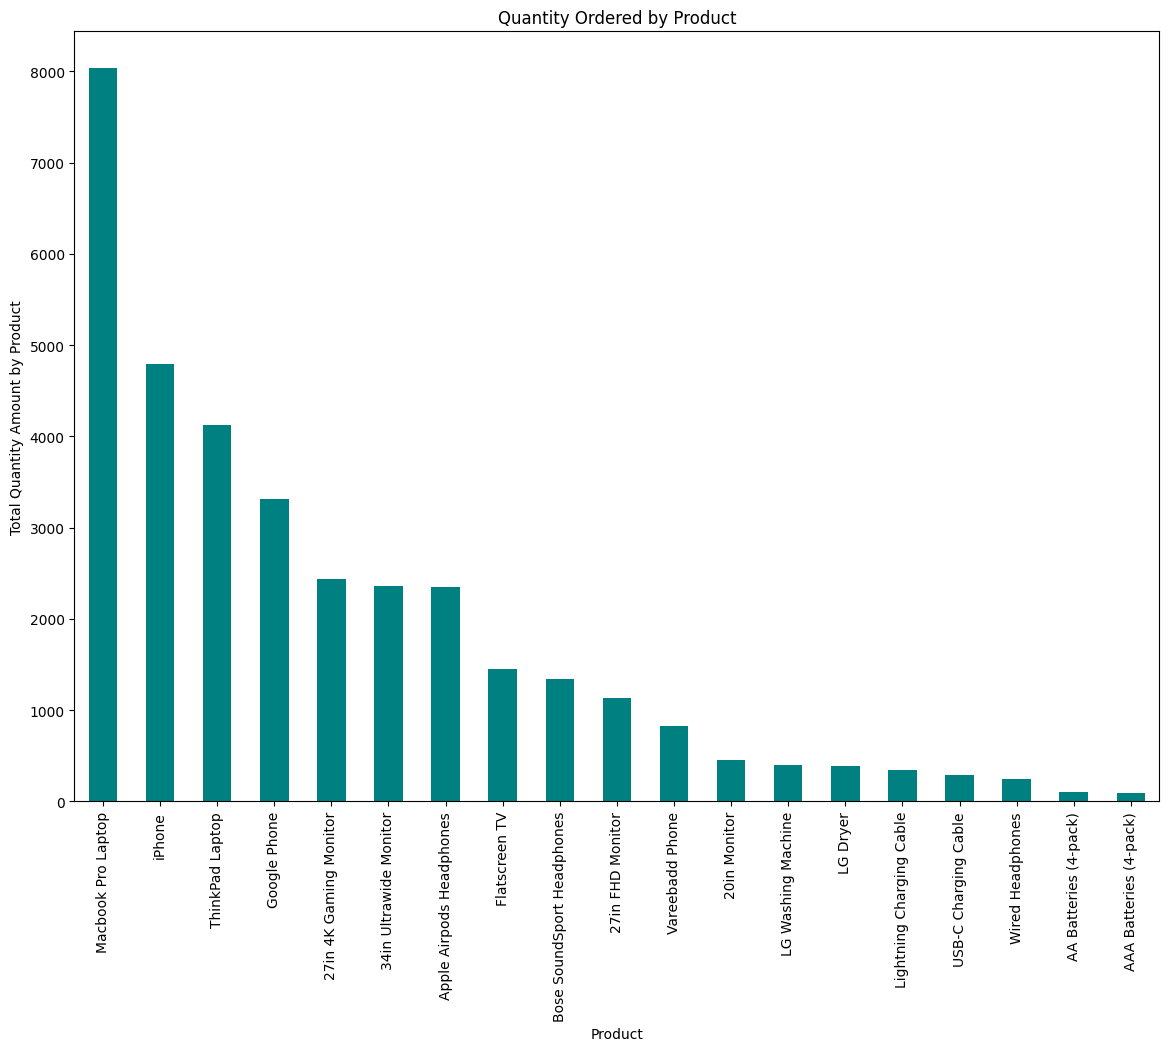

In [28]:
products_count = df_reset.groupby('Product')['Total Price'].sum()/1000
products_count = products_count.sort_values(ascending=False)
products_count

plt.figure(figsize=(14, 10))
graph2 = products_count.plot(kind='bar', color='magenta')

plt.title('Total Transaction Amount by Product (Thousand Dollars)')
plt.xlabel('Product')
plt.ylabel('Total Transaction Amount')

graph2.ticklabel_format(style='plain', axis='y')

plt.show()

quantity_count = df_reset.groupby('Product')['Quantity Ordered'].sum()
quantity_count = products_count.sort_values(ascending=False)
quantity_count

plt.figure(figsize=(14, 10))
graph2 = quantity_count.plot(kind='bar', color='teal')

plt.title('Quantity Ordered by Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity Amount by Product')

graph2.ticklabel_format(style='plain', axis='y')

plt.show()

Create graph of all the revenue generated in April so you can determine when to advertise.

You should aim to advertise on the 31 of April, since sales are the lowest that day.


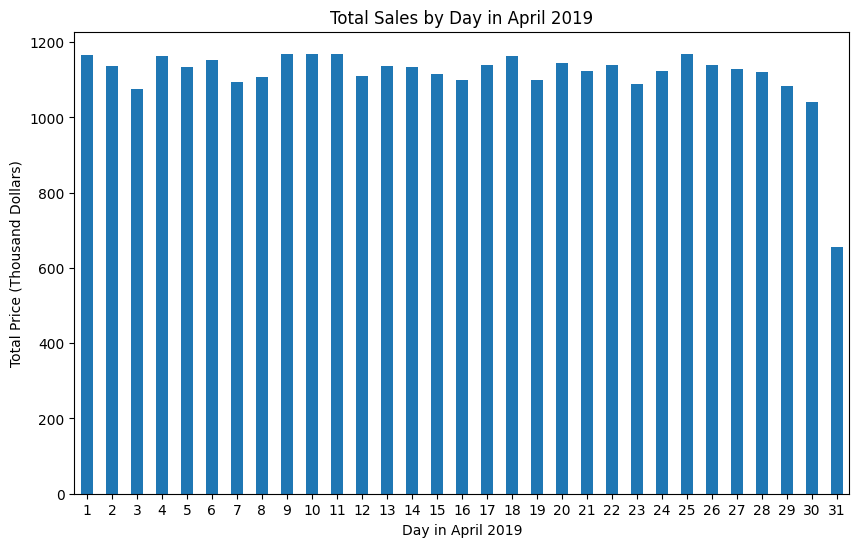

In [29]:

df_reset['Order Date'] = pd.to_datetime(df_reset['Order Date'], format='%m/%d/%y %H:%M')
df_reset['Day'] = df_reset['Order Date'].dt.day

daily_sales = df_reset.groupby('Day')['Total Price'].sum()/1000
min_day = daily_sales.idxmin()
print("You should aim to advertise on the", min_day, "of April, since sales are the lowest that day.")

plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar')
plt.xlabel('Day in April 2019')
plt.ylabel('Total Price (Thousand Dollars)')
plt.title('Total Sales by Day in April 2019')
plt.xticks(rotation=0)
plt.show()

In [30]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


Make a graph to understand what time of day you make the most money.

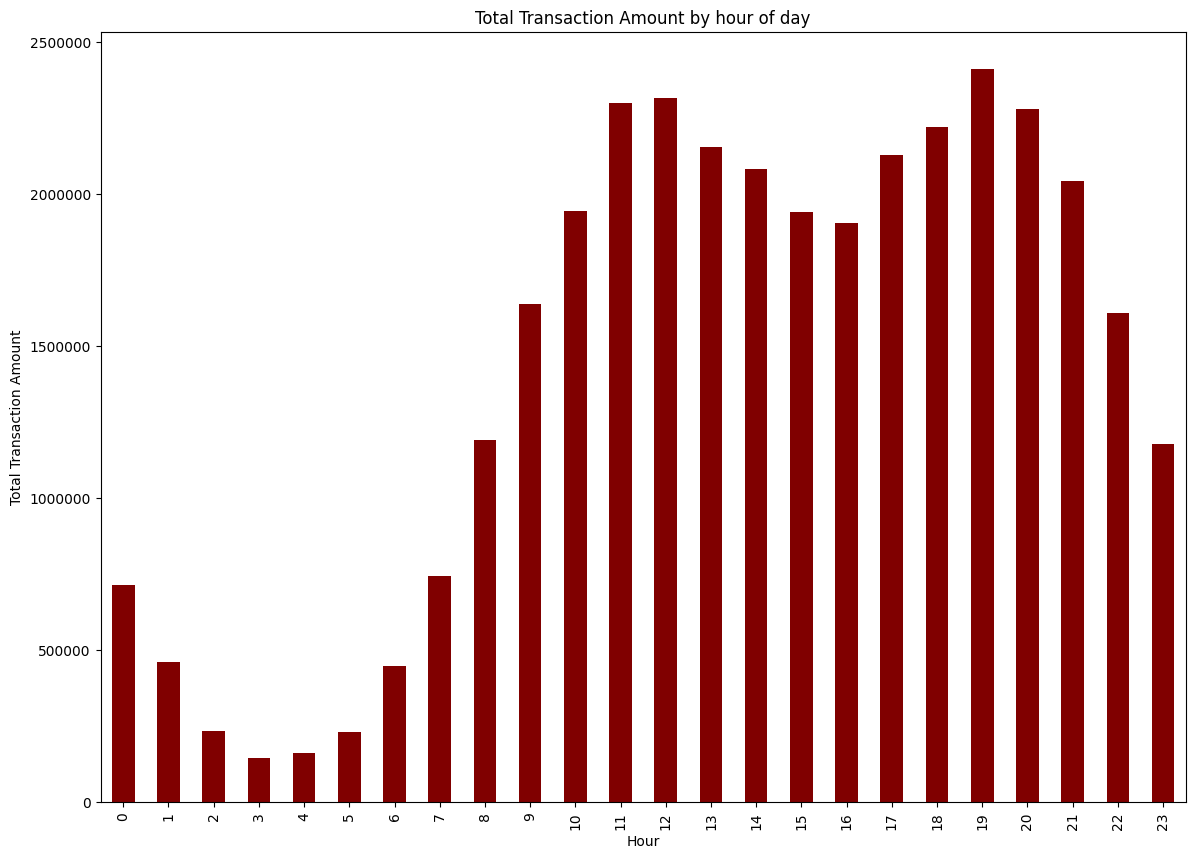

In [31]:
df_reset['hour']= pd.to_datetime(df_reset['Order Date']).dt.hour
df_reset.head(10)
sale_by_hour = df_reset.groupby('hour')['Total Price'].sum()
plt.figure(figsize=(14, 10))
graph3 = sale_by_hour.plot(kind='bar', color='maroon')

plt.title('Total Transaction Amount by hour of day')
plt.xlabel('Hour')
plt.ylabel('Total Transaction Amount')

graph3.ticklabel_format(style='plain', axis='y')

plt.show()


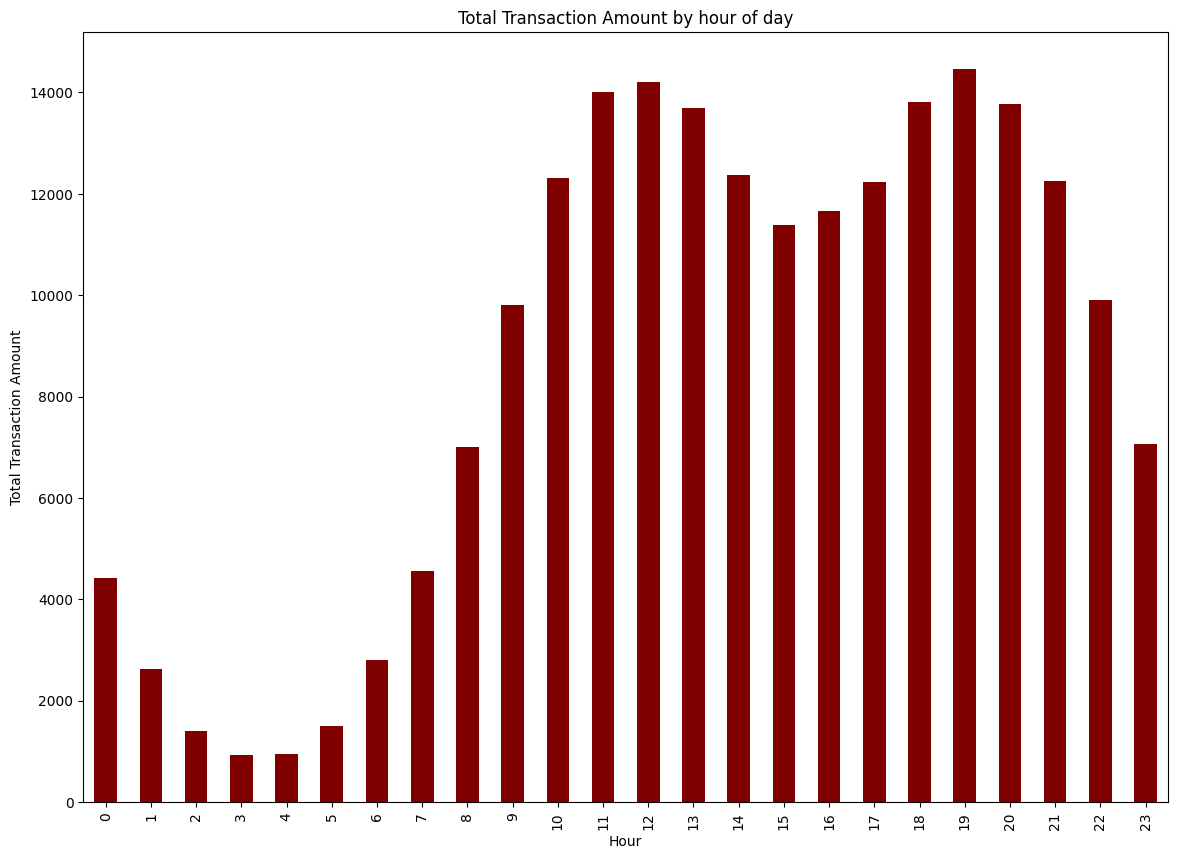

In [32]:
df_reset['hour']= pd.to_datetime(df_reset['Order Date']).dt.hour
df_reset.head(10)
sale_by_hour = df_reset.groupby('hour')['Quantity Ordered'].sum()
plt.figure(figsize=(14, 10))
graph4 = sale_by_hour.plot(kind='bar', color='maroon')

plt.title('Total Transaction Amount by hour of day')
plt.xlabel('Hour')
plt.ylabel('Total Transaction Amount')

graph4.ticklabel_format(style='plain', axis='y')

plt.show()


Figure out which order ID's have duplicates, these orders are the ones where customers bought multiple things at once.

In [33]:
duplicates = df_reset['Order ID'][df['Order ID'].duplicated()]

# Display the duplicate values and their counts
duplicate_counts = duplicates.value_counts()
duplicate_counts

,count
Order ID,
150951,2
219218,2
191042,2
303458,2
273832,2
...,...
199860,1
199827,1
199811,1


Use the duplicated order ID to figure out which products are commonly sold together.

In [34]:
# find which products are frequently sold together using the duplicates in orderID

df_duplicated = df_reset[df_reset.duplicated(subset=['Order ID'], keep=False)]
grouped_orders = df_duplicated.groupby('Order ID')['Product'].apply(list)
print(grouped_orders.head())
product_combinations = {}

for order in grouped_orders:
  # Sort the products to avoid counting (A, B) and (B, A) separately
  order = sorted(order)
  # Convert the list to a tuple to make it hashable
  order_tuple = tuple(order) # Convert list to tuple
  if order_tuple in product_combinations: # Check if tuple is in dictionary
      product_combinations[order_tuple] += 1
  else:
      product_combinations[order_tuple] = 1

sorted_combinations = sorted(product_combinations.items(), key=lambda x: x[1], reverse=True)

for order, count in sorted_combinations[:10]:  # Display top 10 combinations
  print(order, count)

Order ID
141275             [USB-C Charging Cable, Wired Headphones]
141290    [Apple Airpods Headphones, AA Batteries (4-pack)]
141365                  [Vareebadd Phone, Wired Headphones]
141384                 [Google Phone, USB-C Charging Cable]
141450           [Google Phone, Bose SoundSport Headphones]
Name: Product, dtype: object
('Lightning Charging Cable', 'iPhone') 891
('Google Phone', 'USB-C Charging Cable') 868
('Wired Headphones', 'iPhone') 374
('USB-C Charging Cable', 'Vareebadd Phone') 318
('Google Phone', 'Wired Headphones') 311
('Apple Airpods Headphones', 'iPhone') 299
('Bose SoundSport Headphones', 'Google Phone') 169
('Vareebadd Phone', 'Wired Headphones') 110
('AA Batteries (4-pack)', 'Lightning Charging Cable') 103
('Lightning Charging Cable', 'USB-C Charging Cable') 96
